## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

## 2. Import dataset

In [2]:
#create file path
path = r'C:\Users\krist\ATX Metro Bike'

In [4]:
#import dataset
#recieved warning that 9out of 14 columns have mixed data types, set low_memory=False 
metrobikes = pd.read_csv(os.path.join(path, '02.Data', 'OriginalData', 'Austin_MetroBike_Trips.csv'),
                        low_memory=False)

In [5]:
#check df shape
metrobikes.shape

(1991726, 14)

In [26]:
metrobikes.head(10)

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,16459203,Local365,37,classic,12/01/2017 09:51:41 AM,12/01/2017,9:51:41,2496.0,8th & Congress,2495,4th & Congress,3,12,2017
1,4106422,Local365,971,classic,03/13/2015 04:20:24 PM,03/13/2015,16:20:24,2495.0,4th/Congress,2495,4th/Congress,14,3,2015
2,3454605,Local365,29,classic,10/14/2014 08:33:54 AM,10/14/2014,8:33:54,2712.0,Toomey Rd @ South Lamar,2575,Riverside/South Lamar,22,10,2014
3,3454592,Local365,646,classic,10/14/2014 08:32:03 AM,10/14/2014,8:32:03,2552.0,3rd/West,2496,8th/Congress,29,10,2014
4,4106421,24 Hour Walk Up Pass,124,classic,03/13/2015 04:20:15 PM,03/13/2015,16:20:15,2498.0,Dean Keeton/Speedway,2549,South 1st/Riverside @ Long Center,10,3,2015
5,15806492,Local30,970,classic,08/30/2017 03:14:30 PM,08/30/2017,15:14:30,2542.0,Plaza Saltillo,2495,4th & Congress,8,8,2017
6,16472401,Weekender,969,classic,12/03/2017 01:52:35 PM,12/03/2017,13:52:35,3687.0,Boardwalk West,3687,Boardwalk West,18,12,2017
7,16473021,Walk Up,362,classic,12/03/2017 03:01:36 PM,12/03/2017,15:01:36,2540.0,17th & Guadalupe,2574,Zilker Park,28,12,2017
8,16478272,Local365,299,classic,12/04/2017 05:24:12 PM,12/04/2017,17:24:12,3621.0,Nueces & 3rd,2552,3rd & West,7,12,2017
9,16491625,Walk Up,166,classic,12/09/2017 10:48:17 AM,12/09/2017,10:48:17,2572.0,Barton Springs Pool,2572,Barton Springs Pool,10,12,2017


### dataframe has 1,991,762 rows, 14 columns

## 3. Check datatypes

In [6]:
#check data types
metrobikes.dtypes

Trip ID                    int64
Membership Type           object
Bicycle ID                object
Bike Type                 object
Checkout Datetime         object
Checkout Date             object
Checkout Time             object
Checkout Kiosk ID        float64
Checkout Kiosk            object
Return Kiosk ID           object
Return Kiosk              object
Trip Duration Minutes      int64
Month                      int64
Year                       int64
dtype: object

### Suspect columsn where dtype = object is a mixed datatype column

## 4. Check for mixed datatypes

In [31]:
#check that variables assigned as objects are mixed datatypes
for col in metrobikes.columns.tolist():
  weird = (metrobikes[[col]].applymap(type) != metrobikes[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (metrobikes[weird]) > 0:
    print (col)


Membership Type
Return Kiosk ID


### membership type and return kiosk ID are mixed data type columns

## 5. Check descriptive Statistics 

In [17]:
#check descriptive statistics for numerical columns
metrobikes.describe()

,Trip ID,Checkout Kiosk ID,Trip Duration Minutes,Month,Year
count,1.991726e+06,1.987279e+06,1.991726e+06,1.991726e+06,1.991726e+06
mean,1.808550e+07,3.167224e+03,2.996496e+01,6.281600e+00,2.018634e+03
std,8.214574e+06,9.209812e+02,1.270687e+02,3.230310e+00,2.784478e+00
min,1.954839e+06,1.001000e+03,2.000000e+00,1.000000e+00,2.013000e+03
25%,1.259246e+07,2.547000e+03,6.000000e+00,3.000000e+00,2.016000e+03
50%,1.845126e+07,2.575000e+03,1.200000e+01,6.000000e+00,2.018000e+03
75%,2.562556e+07,3.795000e+03,2.800000e+01,9.000000e+00,2.021000e+03
max,3.040914e+07,7.341000e+03,3.423800e+04,1.200000e+01,2.023000e+03


### min trip duration makes sense but max is 34,238 minutes (23 days and 18 hours). Suspect outliers in trip duration.
### max and min month and year make sense

## 6. Investigate Trip Duration Minutes values for outliers

In [56]:
#calculate value trip duration needs to be greater than to count as outlier
outlier_high_threshold = (metrobikes['Trip Duration Minutes'].std() * 3) + metrobikes['Trip Duration Minutes'].mean()
outlier_high_threshold

411.17099165417903

<Axes: >

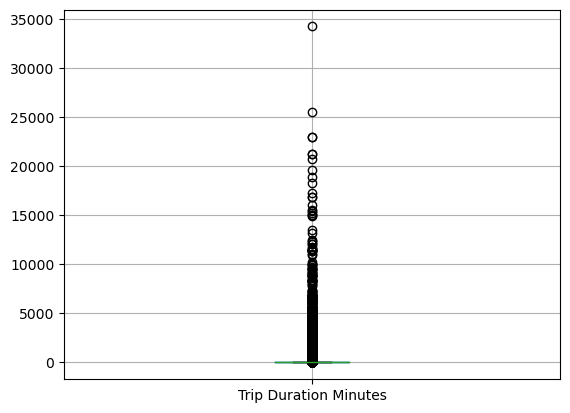

In [51]:
#check boxplot to visualize spread
metrobikes.boxplot(column = 'Trip Duration Minutes')

In [58]:
#create outlier subgroup to check number of outliers
duration_outliers = metrobikes[metrobikes['Trip Duration Minutes'] > 411]
duration_outliers.shape

(14778, 14)

### 14,778 outliers in trip duration minutes accounts for 0.7% of dataset

## 7. Investigate variables with dtype = object

In [19]:
#check frequencies of membership type
metrobikes['Membership Type'].value_counts()

Local365                                              359923
U.T. Student Membership                               289041
24 Hour Walk Up Pass                                  271899
Student Membership                                    271794
Walk Up                                               260044
Local31                                               126746
Explorer                                               91207
Pay-as-you-ride                                        60382
Local30                                                55777
3-Day Weekender                                        49637
Weekender                                              40500
Single Trip (Pay-as-you-ride)                          34260
Local365+Guest Pass                                    13992
Single Trip                                            11709
Founding Member                                         6130
3-Day Explorer                                          6016
7-Day                   

### large number of membership types. may benefit from column derivation for category consolidation

In [20]:
#check frequencies of bicycle id
metrobikes['Bicycle ID'].value_counts()

559          3816
951          3575
593          3575
107          3563
371          3543
             ... 
Block 70        2
Block 12        2
Block04         2
Block05         1
Block 25        1
Name: Bicycle ID, Length: 1019, dtype: int64

In [21]:
metrobikes['Bicycle ID'].nunique()

1019

### 1019 different bicycle ID, some are numbers some have strings

In [23]:
#check frequencies of bike type
metrobikes['Bike Type'].value_counts()

classic     1331702
electric     660024
Name: Bike Type, dtype: int64

### bikes categorized as classic (66.9%) or electric (33%)

In [28]:
#check frequencies of checkout chekcout kiosk
metrobikes['Checkout Kiosk'].value_counts()

21st/Speedway @ PCL      73263
21st & Speedway @PCL     71145
Dean Keeton/Speedway     48270
Zilker Park              47031
Riverside/South Lamar    32512
                         ...  
Eeyore's 2018                2
Mobile Station               1
Stolen                       1
cesar Chavez/Congress        1
Eeyore's 2017                1
Name: Checkout Kiosk, Length: 200, dtype: int64

### 200 different checkout kiosk locations with duplicates

In [29]:
#check frequencies of return kiosk
metrobikes['Return Kiosk'].value_counts()

21st/Speedway @ PCL                            74515
21st & Speedway @PCL                           73312
Dean Keeton/Speedway                           52402
Zilker Park                                    51082
21st/Guadalupe                                 32232
                                               ...  
Mobile Station                                     8
Mobile Station @ Boardwalk Opening Ceremony        4
Eeyore's 2017                                      4
Earth Day ATX 2017                                 2
Re-branding                                        1
Name: Return Kiosk, Length: 201, dtype: int64

### 201 different return kiosk names with duplicates

In [60]:
#check frequencies of return kiosk ID
metrobikes['Return Kiosk ID'].value_counts()

3798     144033
2498      68181
2575      57658
2707      53967
2499      52047
          ...  
2500        418
3456        369
1008        257
Event       119
1001         15
Name: Return Kiosk ID, Length: 106, dtype: int64

### mix of numbers and characters, only non-numeric label is Event and only has 119 rows, will remove

## 8. Check for missing values

In [30]:
metrobikes.isnull().sum()

Trip ID                      0
Membership Type           5237
Bicycle ID                   0
Bike Type                    0
Checkout Datetime            0
Checkout Date                0
Checkout Time                0
Checkout Kiosk ID         4447
Checkout Kiosk               0
Return Kiosk ID          31788
Return Kiosk                 0
Trip Duration Minutes        0
Month                        0
Year                         0
dtype: int64

### 5,237 missing in Membership Type, 4,447 missing in Checkout Kiosk ID, 31,788 missing in Return Kiosk ID
### 0.2% missing in Membership Type, 0.2% missing in Checkout Kiosk ID, 1.6% missing in Return Kiosk ID
### 2% total missing from dataset

## 9. Investigate missing values for patterns

### Checkout Kiosk ID Missing Values

In [34]:
#create subset to look for patterns in checkout kiosk ID
checkout_ID_missing = metrobikes[metrobikes['Checkout Kiosk ID'].isnull() == True]
checkout_ID_missing.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
1459,4091089,Founding Member,712,classic,03/12/2015 11:45:16 AM,03/12/2015,11:45:16,NaN,Repair Shop,2548,Guadalupe/West Mall @ University Co-op,14,3,2015
1466,4091011,Local365,483,classic,03/12/2015 11:36:47 AM,03/12/2015,11:36:47,NaN,Ready for deployment,2497,11th/Congress @ The Texas Capitol,2,3,2015
2169,4073137,Local365,503,classic,03/10/2015 03:11:03 PM,03/10/2015,15:11:03,NaN,Ready for deployment,2568,East 11th/Victory Grill,8,3,2015
3289,4048996,Local365,214,classic,03/06/2015 06:06:15 PM,03/06/2015,18:06:15,NaN,Ready for deployment,2569,East 11th/San Marcos,8,3,2015
3607,4040490,Local365,571,classic,03/05/2015 04:55:42 PM,03/05/2015,16:55:42,NaN,Ready for deployment,2569,East 11th/San Marcos,8,3,2015


In [33]:
checkout_ID_missing['Checkout Kiosk'].value_counts()

Dean Keeton & Speedway                                3670
Ready for deployment                                   279
Bullock Museum @ Congress & MLK                        167
State Capitol @ 14th & Colorado                        106
Springfest 2022                                         32
MapJam at Pan Am Park                                   32
MapJam at French Legation                               26
MapJam at Hops & Grain Brewery                          17
Repair Shop                                             15
Main Office                                             14
MapJam at Scoot Inn                                     11
Mobile Station @ Boardwalk Opening Ceremony              9
Re-branding                                              5
Rainey St @ Cummings                                     5
Marketing Event                                          4
4th & Congress                                           4
2nd & Congress                                          

### 394 are d/t jams or repair and are good candidates for removal, many are simply uncategorized but should have kiosk IDs

### Return Kiosk ID Missing Values

In [42]:
#create subset to look for patterns in return kiosk ID
return_ID_missing = metrobikes[metrobikes['Return Kiosk ID'].isnull() == True]
return_ID_missing.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
364,4103736,24 Hour Walk Up Pass,561,classic,03/13/2015 01:38:09 PM,03/13/2015,13:38:09,2494.0,2nd/Congress,NaN,Customer Service,39,3,2015
1163,4095624,24 Hour Walk Up Pass,869,classic,03/12/2015 04:50:07 PM,03/12/2015,16:50:07,2539.0,3rd/Trinity @ The Convention Center,NaN,Customer Service,29,3,2015
1368,4092408,Founding Member,207,classic,03/12/2015 01:39:33 PM,03/12/2015,13:39:33,2497.0,11th/Congress @ The Texas Capitol,NaN,Ready for deployment,2,3,2015
1489,4090600,Local365,483,classic,03/12/2015 11:00:34 AM,03/12/2015,11:00:34,2539.0,3rd/Trinity @ The Convention Center,NaN,Ready for deployment,26,3,2015
2245,4071954,Local365,248,classic,03/10/2015 12:54:39 PM,03/10/2015,12:54:39,2568.0,East 11th/Victory Grill,NaN,Ready for deployment,8,3,2015


In [59]:
#check return kiosk names to investigate if information to fill missing values is available
return_ID_missing['Return Kiosk'].value_counts()

Dean Keeton & Speedway      4056
21st/Speedway @ PCL         3702
Dean Keeton/Speedway        2495
26th/Nueces                 1581
Dean Keeton/Whitis          1234
                            ... 
City Hall / Lavaca & 2nd       1
17th & Guadalupe               1
21st & Speedway @PCL           1
Re-branding                    1
Davis at Rainey Street         1
Name: Return Kiosk, Length: 126, dtype: int64

### Most missing values have a kiosk name but haven't been assigned kiosk number

### Membership type missing values

In [43]:
#create subset to look for patterns in Membership Type
mem_type_missing = metrobikes[metrobikes['Membership Type'].isnull() == True]
mem_type_missing.head()

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
206494,14560892,NaN,190,classic,04/24/2017 09:50:12 AM,04/24/2017,9:50:12,3619.0,6th & Congress,3294,Guadalupe & 6th,4,4,2017
206495,14560158,NaN,181,classic,04/24/2017 08:46:35 AM,04/24/2017,8:46:35,2501.0,5th & Bowie,3292,East 4th & Chicon,22,4,2017
206506,14479978,NaN,326,classic,04/17/2017 02:49:23 PM,04/17/2017,14:49:23,2496.0,8th & Congress,2570,South Congress & Academy,22,4,2017
206512,17336091,NaN,1486,classic,05/10/2018 09:47:51 AM,05/10/2018,9:47:51,2499.0,City Hall / Lavaca & 2nd,2562,San Jacinto & 8th Street,9,5,2018
206520,14315367,NaN,749,classic,04/05/2017 08:06:26 AM,04/05/2017,8:06:26,2494.0,2nd & Congress,2540,17th & Guadalupe,84,4,2017


In [44]:
#check interaction between membership type and year
mem_type_missing['Year'].value_counts()

2018    3406
2017    1728
2020      49
2019      36
2021      13
2022       5
Name: Year, dtype: int64

### most rows that have missing memberships are from 2018 and 2017

## 10. Check for duplicates

In [49]:
#create duplicates dataframe
df_dupes = metrobikes[metrobikes.duplicated()]
df_dupes

,Trip ID,Membership Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year


### No duplicates